# Machine Learning for Classification

In [1]:
import seaborn as sns        # just to get data

In [2]:
# Use built-in dataset
data = sns.load_dataset('titanic')
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# Set x and y 
# y should be categorical data for classification
x = data[['pclass', 'sibsp', 'parch', 'fare']]           # exclude columns with na values
y = data['survived']                                     # Logistic regression requires 1D array

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=5)
x_train.shape, x_test.shape

((757, 4), (134, 4))

In [7]:
type(x_train), type(x_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [8]:
type(x), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

## Logistic Regression (Classification)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
# Get model object
logi = LogisticRegression()
dir(logi)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'warm_start']

In [11]:
# Fit model object with train data
logi.fit(x_train, y_train)

LogisticRegression()

In [12]:
# Namespace changed from when creating object after fitting data
dir(logi)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'w

**[Glossary]**
* **feature**: each column data used for x
* **target**: each column data used for y
* **class**: one of types in a category ▶▶ **binary**: has 2 classes, **multinomial**: has more than 3 classes

For example, in this case, 4 features (pclass, sibsp, parch, fare) are used for decision function. The column 'survived' was categorized into classes 'survived_0' and 'survived_1. Actually, binary category works like 1 class, as it only needs to calculate the probability(p) to be included in one of the classes, leaving the probability for another class 1-p.

In [13]:
# Confirm the classes
logi.classes_

array([0, 1], dtype=int64)

In [14]:
# Attriutes of logistic regression object
logi.coef_, logi.intercept_

(array([[-0.66911052, -0.15189898,  0.30567347,  0.00553094]]),
 array([0.80234682]))

Logistic regresion also returns a decision function as follows:
* **y = (- 0.66911052 * pclass) - (0.15189898 * sibsp) + (0.30567347 * parch) + (0.00553094 * fare) + 0.80234682**

#### 1) Predict probability
* **Binary class**: sigmoid function
* **Multinomial class**: softmax function

In [17]:
# Predict probability with softmax
logi.predict_proba(x_test[:10])

array([[0.76171771, 0.23828229],
       [0.76224435, 0.23775565],
       [0.76234457, 0.23765543],
       [0.70940789, 0.29059211],
       [0.76110229, 0.23889771],
       [0.43117945, 0.56882055],
       [0.35168011, 0.64831989],
       [0.73645644, 0.26354356],
       [0.3187355 , 0.6812645 ],
       [0.76080046, 0.23919954]])

#### 2) Predict class

In [94]:
# Predict class of test data
logi.predict(x_test[:10])

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [95]:
# Compare with actual data
y_test[:10].to_numpy()

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

#### 3) Score (= Mean Accuracy)

In [18]:
logi.score(x_test, y_test)      # Mean difference between predict(x_test) & actual y

0.6940298507462687

As we can see the **quite difference between the prediction of category and the actual one**, the score is a bit low.

---
---
### Another Case to Check the Quality of Logistic Regression Model
Column 'pclass' and 'class' have the exactly same information. Can see if the model predicts well or not.

In [19]:
x2 = data[['pclass']]
y2 = data['class']          # dtype: category, multinomial
logi2 = LogisticRegression()
logi2.fit(x2, y2)

LogisticRegression()

In [20]:
logi2.classes_              # returned categories are same with the ones from column data

array(['First', 'Second', 'Third'], dtype=object)

In [21]:
logi2.coef_, logi2.intercept_

(array([[-6.8776205 ],
        [-0.25531144],
        [ 7.13293194]]),
 array([ 12.67387951,   2.63684091, -15.31072043]))

The outcome above means:
* Regression 1 for 'First' class: **y = - 6.8776205 * x + 12.67387951**
* Regression 2 for 'Second' class: **y = - 0.25531144 * x + 2.63684091**
* Regression 3 for 'Third' class: **y = 7.13293194 * x - 15.31072043**
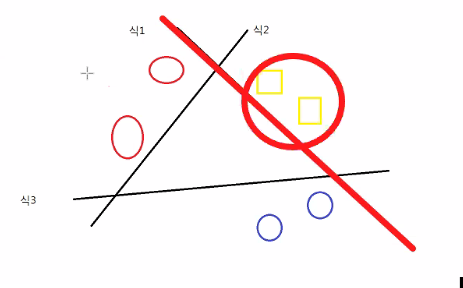
The elements above or below a line are seperated and categorized by the equation.

In [27]:
# Calculate the probability from the equations above
first = - 6.8776205 * x2 + 12.67387951                # First class prediction
second = - 0.25531144 * x2 + 2.63684091               # Second class
third = 7.13293194 * x2 -15.31072043                  # Third class
type(first)

pandas.core.frame.DataFrame

In [29]:
import pandas as pd

df = pd.concat([first, second, third], axis=1)
df.columns = ['First', 'Second', 'Third']
df.tail()

,First,Second,Third
886,-1.081361,2.126218,-1.044857
887,5.796259,2.381529,-8.177788
888,-7.958982,1.870907,6.088075
889,5.796259,2.381529,-8.177788
890,-7.958982,1.870907,6.088075


In [31]:
# Decision function - 3 linear lines
pd.DataFrame(logi2.decision_function(x2), columns = ['First', 'Second', 'Third']).tail()

,First,Second,Third
886,-1.081361,2.126218,-1.044857
887,5.796259,2.381529,-8.177788
888,-7.958982,1.870907,6.088075
889,5.796259,2.381529,-8.177788
890,-7.958982,1.870907,6.088075


In [32]:
# Compare with the probability data - after softmax function
pd.DataFrame(logi2.predict_proba(x2), columns=['First', 'Second', 'Third']).tail()

,First,Second,Third
886,3.737429e-02,0.923862,3.876384e-02
887,9.681609e-01,0.031838,8.262202e-07
888,7.817812e-07,0.014526,9.854730e-01
889,9.681609e-01,0.031838,8.262202e-07
890,7.817812e-07,0.014526,9.854730e-01


In [33]:
# Predict class
pd.DataFrame(logi2.predict(x2), columns=['Class']).tail()

,Class
886,Second
887,First
888,Third
889,First
890,Third


In [34]:
# Finally, compare with the actual data
y2.tail()

886    Second
887     First
888     Third
889     First
890     Third
Name: class, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [35]:
# Get score
logi2.score(x2, y2)      # accurate prediction of category

1.0

All four comparison data point to the same result. What we can learn from above is:<br>
**1)** Regression equations(decision functions) and predict_proba() results are not same. It is due to the **softmax (or sigmoid) function**.<br>
**2)** Column 'pclass' and 'class' are about exactly same information. But the probability is not exact 1 (more than 0.9) as it's just a predictive model, while score is 1.0.

---
---
## Onehot-encoding >> Linear Regression
Logistic Regression can be also solved in different way as below.<br>
**Onehot-encoding** convert `object` and `category` datatype into `unit`, which enables the info treated as number for linear regression.

Does it derive the same result with the logistic regression?

In [36]:
enc = pd.get_dummies(data)   # onehot-encoding: sex, embarked, class, who, deck, embark_town, alive
enc.head(3)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,0,1,...,0,0,0,0,0,0,0,1,1,0
1,1,1,38.0,1,0,71.2833,False,False,1,0,...,1,0,0,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,False,True,1,0,...,0,0,0,0,0,0,0,1,0,1


In [37]:
# Check columns impacted
enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      714 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   adult_male               891 non-null    bool   
 7   alone                    891 non-null    bool   
 8   sex_female               891 non-null    uint8  
 9   sex_male                 891 non-null    uint8  
 10  embarked_C               891 non-null    uint8  
 11  embarked_Q               891 non-null    uint8  
 12  embarked_S               891 non-null    uint8  
 13  class_First              891 non-null    uint8  
 14  class_Second             8

In [38]:
# Set x and y
x3 = enc[['pclass', 'sibsp', 'parch', 'fare']]  
y3 = enc[['alive_no', 'alive_yes']]                      # same information with 'survived'

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression()
lm.fit(x3, y3)

LinearRegression()

In [41]:
# Get attributes
lm.coef_, lm.intercept_

(array([[ 0.16582437,  0.02880357, -0.0569487 , -0.00088876],
        [-0.16582437, -0.02880357,  0.0569487 ,  0.00088876]]),
 array([0.26862118, 0.73137882]))

Like multinomial class logistic regression above, if there are several targets, the shape of the coefficient array is (# of targets, # of features). Should build each regression equation for each target. 
* **alive_no = 0.16582437 * x1 + 0.02880357 * x2 - 0.0569487 * x3 - 0.00088876 * x4 + 0.26862118**
* **alive_yes = - 0.16582437 * x1 - 0.02880357 * x2 + 0.0569487 * x3 + 0.00088876 * x4 + 0.73137882**

In [58]:
# Predict data
y_pred = pd.DataFrame(lm.predict(x3), columns=['alive_no', 'alive_yes'])
y_pred.tail()

,alive_no,alive_yes
886,0.588716,0.411284
887,0.407783,0.592217
888,0.660159,0.339841
889,0.407783,0.592217
890,0.759206,0.240794


We can see the values are probability and the probability of **alive_no + alive_yes = 1**. Will change it into 0 and 1 values to see which category it falls into.

In [78]:
# Change into 1 and 0
no = y_pred[y_pred['alive_no'] > y_pred['alive_yes']]
no['alive_no'] = 1
no['alive_yes'] = 0
no

yes = y_pred[y_pred['alive_no'] < y_pred['alive_yes']]
yes['alive_no'] = 0
yes['alive_yes'] = 1

C:\Users\sori-\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sori-\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\sori-\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [87]:
# Concat dataframe 'no' and 'yes'
y_pred_cat = pd.concat([no, yes], axis=0).sort_index()
y_pred_cat.tail()

,alive_no,alive_yes
886,1,0
887,0,1
888,1,0
889,0,1
890,1,0


In [46]:
# Compare with actual data
y3.tail()

,alive_no,alive_yes
886,1,0
887,0,1
888,1,0
889,0,1
890,1,0


In [55]:
# Confirm score: R-squared
lm.score(x3, y3)                 # Small value

0.12980166965308393

There is two different predictive equation for 'alive_no' and 'alive_yes', but only one R-squared is obtained. Don't know how it calculated, guessing average or stuff. <br>
R-squared is small as its prediction is not 0 or 1. **Should find mean accuracy to see how many it predicts correctly**. The code below is covered in depth later in 'Evaluation' chapter. 

In [51]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(y3['alive_no'], y_pred_cat['alive_no']))

              precision    recall  f1-score   support

           0       0.63      0.44      0.52       342
           1       0.71      0.84      0.77       549

    accuracy                           0.69       891
   macro avg       0.67      0.64      0.65       891
weighted avg       0.68      0.69      0.67       891



In [90]:
print(classification_report(y3['alive_yes'], y_pred_cat['alive_yes']))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       549
           1       0.63      0.44      0.52       342

    accuracy                           0.69       891
   macro avg       0.67      0.64      0.65       891
weighted avg       0.68      0.69      0.67       891

